In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ExpSineSquared
import time

In [2]:
# Put countries inside a list
countries = ['Canada', 'China', 'France', 'United States']

In [3]:
df_inflation = pd.read_csv('Inflation, consumer prices (annual %).csv')

In [4]:
# Function to filter out every country that is not Canada (35), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

# Function to extract specific columns from the graph
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [5]:
# Long Term Inflation Dataset
df_inflation1 = getImportantContries(df_inflation)
df_inflation1.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = dataframe_column_cutter(df_inflation1,-31,-1)
df_inflation1_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = df_inflation1_long_cut.T

In [6]:
lis1 = df_inflation1_long_cut.index
res1 = np.array([int(i) for i in lis1])

In [26]:
rng = np.random.RandomState(0)
data = res1
y = df_inflation1_long_cut['China'].values.tolist()
target = np.array(y)

In [27]:
training_sample_indices = rng.choice(np.arange(0, 30), size=20, replace=False)
training_data = data[training_sample_indices]
training_noisy_target = target[training_sample_indices] + 0.5 * rng.randn(
    len(training_sample_indices)
)

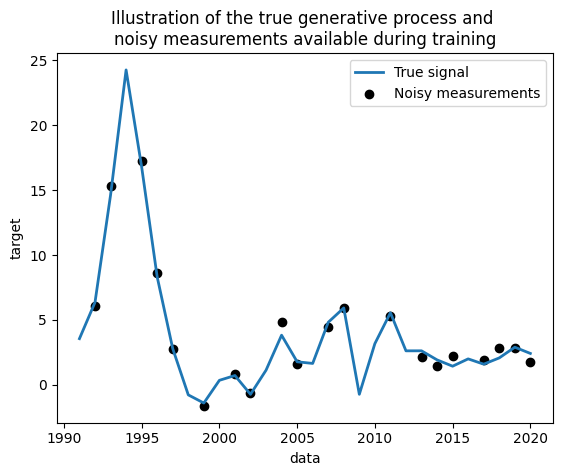

In [28]:
plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Illustration of the true generative process and \n"
    "noisy measurements available during training"
)

In [29]:
kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(
    1e-1
)
gaussian_process = GaussianProcessRegressor(kernel=kernel)
start_time = time.time()
gaussian_process.fit(training_data.reshape(-1, 1), training_noisy_target)
print(
    f"Time for GaussianProcessRegressor fitting: {time.time() - start_time:.3f} seconds"
)

Time for GaussianProcessRegressor fitting: 0.114 seconds


In [31]:
start_time = time.time()
mean_predictions_gpr, std_predictions_gpr = gaussian_process.predict(
    data.reshape(-1, 1),
    return_std=True,
)
print(
    f"Time for GaussianProcessRegressor predict: {time.time() - start_time:.3f} seconds"
)

Time for GaussianProcessRegressor predict: 0.063 seconds


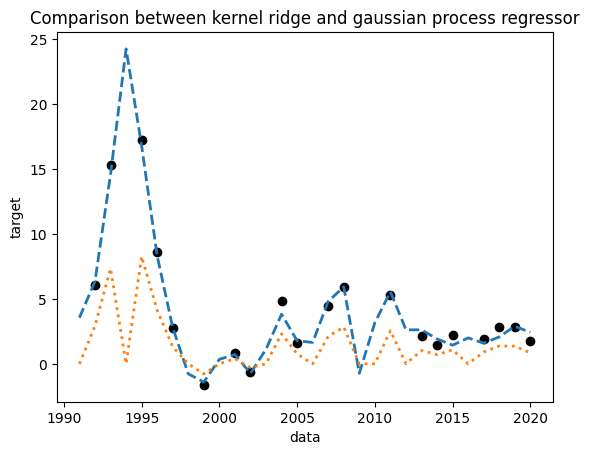

In [35]:
plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
# Plot the predictions of the gaussian process regressor
plt.plot(
    data,
    mean_predictions_gpr,
    label="Gaussian process regressor",
    linewidth=2,
    linestyle="dotted",
)
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("Comparison between kernel ridge and gaussian process regressor")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>